# 03. FashionMNIST DNN

<hr>

### 01. 데이터 가져오기

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# fashion_mnist 이미지 데이터를 튜플 형태로 반환
(train_input, train_target), (test_input, test_target) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# 변수 확인
print("train_input:", train_input.shape)
print("train_target:", train_target.shape)    # tuple 자료형에서 괄호를 생략할 수 있지만, 그 값이 정수인지 tuple인지 확실히 하기 위해 tuple 안에서 ,(comma)로 표시
print("test_input:", test_input.shape)
print("test_target:", test_target.shape)

train_input: (60000, 28, 28)
train_target: (60000,)
test_input: (10000, 28, 28)
test_target: (10000,)


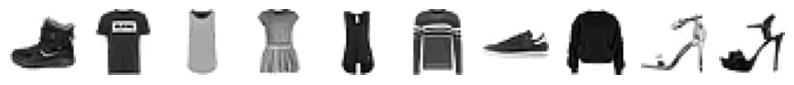

In [4]:
# 이미지 시각화 (10개만)
fig, axs = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')      # gray_r: 흑백 이미지
    axs[i].axis('off')  # 좌표 표시 제거

In [5]:
# 출력한 이미지에 대한 target 데이터 확인
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


<hr>

### 02. 입력데이터 정규화

In [6]:
train_scaled = train_input / 255.0  # min-max scaler (min값이 이미 0이므로 max(255.0)로만 나눠주기)

# 입력데이터: 3 dim >> 2 dim 변환 (reshape 함수)
train_scaled = train_scaled.reshape(-1, 28 * 28)              # 이미지의 픽셀 크기
# (-1, 28*28): 열만 28*28로 맞추고 행의 수는 그에 맞게 알아서 변경(-1)

# 차원 축소한 거 확인
train_scaled.shape

(60000, 784)

<hr>

### 04. 딥러닝 신경망 구성

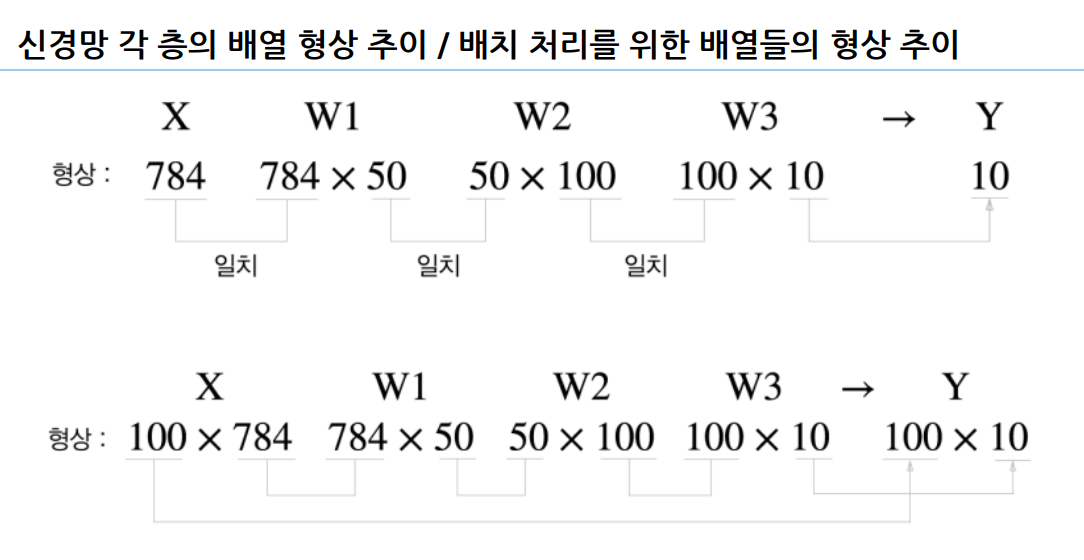

In [7]:
# 모델 생성
model = tf.keras.Sequential()

In [8]:
# 신경망 구성 (첫 번째 레이어)
model.add(tf.keras.layers.Dense(units=50,
                                input_dim=28*28,      # 첫 번째 레이어에는 입력이 몇 개인지 명시해야 함
                                activation='sigmoid', # 모든 뉴런은 활성화 함수를 거쳐서 출력을 내보냄 (각각의 뉴런은 sigmoid)
                                name='hidden1'))      # summary() 함수에서 출력할 레이어의 이름

# (두 번째 레이어)
model.add(tf.keras.layers.Dense(units=100,
                                activation='sigmoid',
                                name='hidden2'))
# (마지막 번째 레이어)
model.add(tf.keras.layers.Dense(units=10,
                                activation='softmax', # 출력층에서는 활성화함수로 softmax 사용
                                name='output'))

In [9]:
model.summary()

# 39250: 입력(28*28) * 출력(50) + bias(50)
# 5100: 입력(50) * 출력(100) + bias(100)
# 1010: 입력(100) * 출력(10) + bias(10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 50)                39250     
_________________________________________________________________
hidden2 (Dense)              (None, 100)               5100      
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              # sparse_categorical_crossentropy 옵션은 one-hot-encoding을 알아서 수행해줌
              optimizer='sgd',          # tf.keras.optimizers.SGD(learning_rate=0.1)
              metrics=['accuracy'])

In [11]:
# 모델 학습
loss = model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 1s 602us/step - loss: 2.1139 - accuracy: 0.3750
Epoch 2/100
1875/1875 [==============================] - 1s 511us/step - loss: 1.5070 - accuracy: 0.5645
Epoch 3/100
1875/1875 [==============================] - 1s 578us/step - loss: 1.1452 - accuracy: 0.6366
Epoch 4/100
1875/1875 [==============================] - 1s 579us/step - loss: 0.9526 - accuracy: 0.6805
Epoch 5/100
1875/1875 [==============================] - 1s 574us/step - loss: 0.8372 - accuracy: 0.7091
Epoch 6/100
1875/1875 [==============================] - 1s 514us/step - loss: 0.7640 - accuracy: 0.7280
Epoch 7/100
1875/1875 [==============================] - 1s 505us/step - loss: 0.7126 - accuracy: 0.7440
Epoch 8/100
1875/1875 [==============================] - 1s 523us/step - loss: 0.6733 - accuracy: 0.7554
Epoch 9/100
1875/1875 [==============================] - 1s 524us/step - loss: 0.6416 - accuracy: 0.7645
Epoch 10/100
1875/1875 [==============================]

1875/1875 [==============================] - 1s 565us/step - loss: 0.3233 - accuracy: 0.8849
Epoch 79/100
1875/1875 [==============================] - 1s 544us/step - loss: 0.3223 - accuracy: 0.8850
Epoch 80/100
1875/1875 [==============================] - 1s 530us/step - loss: 0.3211 - accuracy: 0.8855
Epoch 81/100
1875/1875 [==============================] - 1s 586us/step - loss: 0.3203 - accuracy: 0.8860
Epoch 82/100
1875/1875 [==============================] - 1s 549us/step - loss: 0.3191 - accuracy: 0.8859
Epoch 83/100
1875/1875 [==============================] - 1s 543us/step - loss: 0.3184 - accuracy: 0.8861
Epoch 84/100
1875/1875 [==============================] - 1s 599us/step - loss: 0.3171 - accuracy: 0.8873
Epoch 85/100
1875/1875 [==============================] - 1s 540us/step - loss: 0.3160 - accuracy: 0.8869
Epoch 86/100
1875/1875 [==============================] - 1s 545us/step - loss: 0.3147 - accuracy: 0.8874
Epoch 87/100
1875/1875 [==============================] - 1

<hr>

### 05. 테스트 데이터 정규화

In [12]:
test_scaled = test_input / 255.0

# 입력데이터: 3 dim >> 2 dim 변환 (reshape 함수)
test_scaled = test_scaled.reshape(-1, 28 * 28)              # 이미지의 픽셀 크기
# (-1, 28*28): 열만 28*28로 맞추고 행의 수는 그에 맞게 알아서 변경(-1)

# 차원 축소한 거 확인
test_scaled.shape

(10000, 784)

In [13]:
# 검증용 데이터로 학습된 모델의 정확도 확인
acc = model.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 434us/step - loss: 0.3667 - accuracy: 0.8695
